In [1]:
from microkit_parser import parse_log_data
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
compcert_df = pd.read_csv("new_results/compcert_meson.csv")
compcert_df

,Requested_Throughput,Receive_Throughput,Send_Throughput,Packet_Size,Minimum_RTT,Average_RTT,Maximum_RTT,Stdev_RTT,Median_RTT,???,Idle_Cycles,Total_Cycles
0,10000000,10000184,10000184,1472,73,131,273,20.47,129,0,298828102353,306934897794
1,20000000,20000342,20000342,1472,69,140,244,17.83,150,0,157087699769,165625945579
2,50000000,50000655,50000655,1472,66,132,527,34.26,135,0,71095055315,81047813867
3,100000000,100001094,100000594,1472,100,181,535,97.51,137,0,40783082718,52687920289
4,200000000,199996270,199999270,1472,48,369,848,218.27,308,0,23848830565,38671844853
5,300000000,300002278,300002278,1472,505,684,887,85.20,680,0,18225586037,33948919836
6,400000000,400009560,399999560,1472,552,699,925,71.38,696,0,15720365054,31543297062
7,500000000,500006287,499993787,1472,581,728,984,58.82,732,0,13823349288,30095039141
8,600000000,600006965,600000965,1472,641,748,912,46.37,746,0,12269083034,29145916727
9,700000000,700009918,699999418,1472,686,775,930,35.40,775,0,10875620618,28581165801


In [3]:
gcc_df = pd.read_csv("new_results/gcc_meson.csv")
gcc_df

,Requested_Throughput,Receive_Throughput,Send_Throughput,Packet_Size,Minimum_RTT,Average_RTT,Maximum_RTT,Stdev_RTT,Median_RTT,???,Idle_Cycles,Total_Cycles
0,10000000,10000184,10000184,1472,18,144,599,20.15,151,0,298882970481,306942343779
1,20000000,20000340,20000340,1472,9,153,678,8.54,151,0,157133819212,165625002477
2,50000000,50000650,50000650,1472,27,138,745,15.91,137,0,71124626753,81047077628
3,100000000,100000737,100000237,1472,42,181,502,87.67,141,0,40868043560,52695213119
4,200000000,199997383,199998383,1472,107,375,870,216.00,326,0,23718428161,38667256371
5,300000000,299998878,300003378,1472,516,679,871,85.29,682,0,18136015334,33931986473
6,400000000,400004583,399996583,1472,548,706,1024,73.00,698,0,15651802181,31543916854
7,500000000,500007905,499995405,1472,582,722,990,58.80,724,0,13715468644,30103525767
8,600000000,600010175,600001175,1472,648,748,855,45.66,747,0,12121950133,29137803294
9,700000000,700005132,699994632,1472,671,779,1053,36.21,778,0,10825017673,28575373430


In [4]:
compcert_data = parse_log_data("new_results/compcert_meson.txt")
gcc_data = parse_log_data("new_results/gcc_meson.txt")

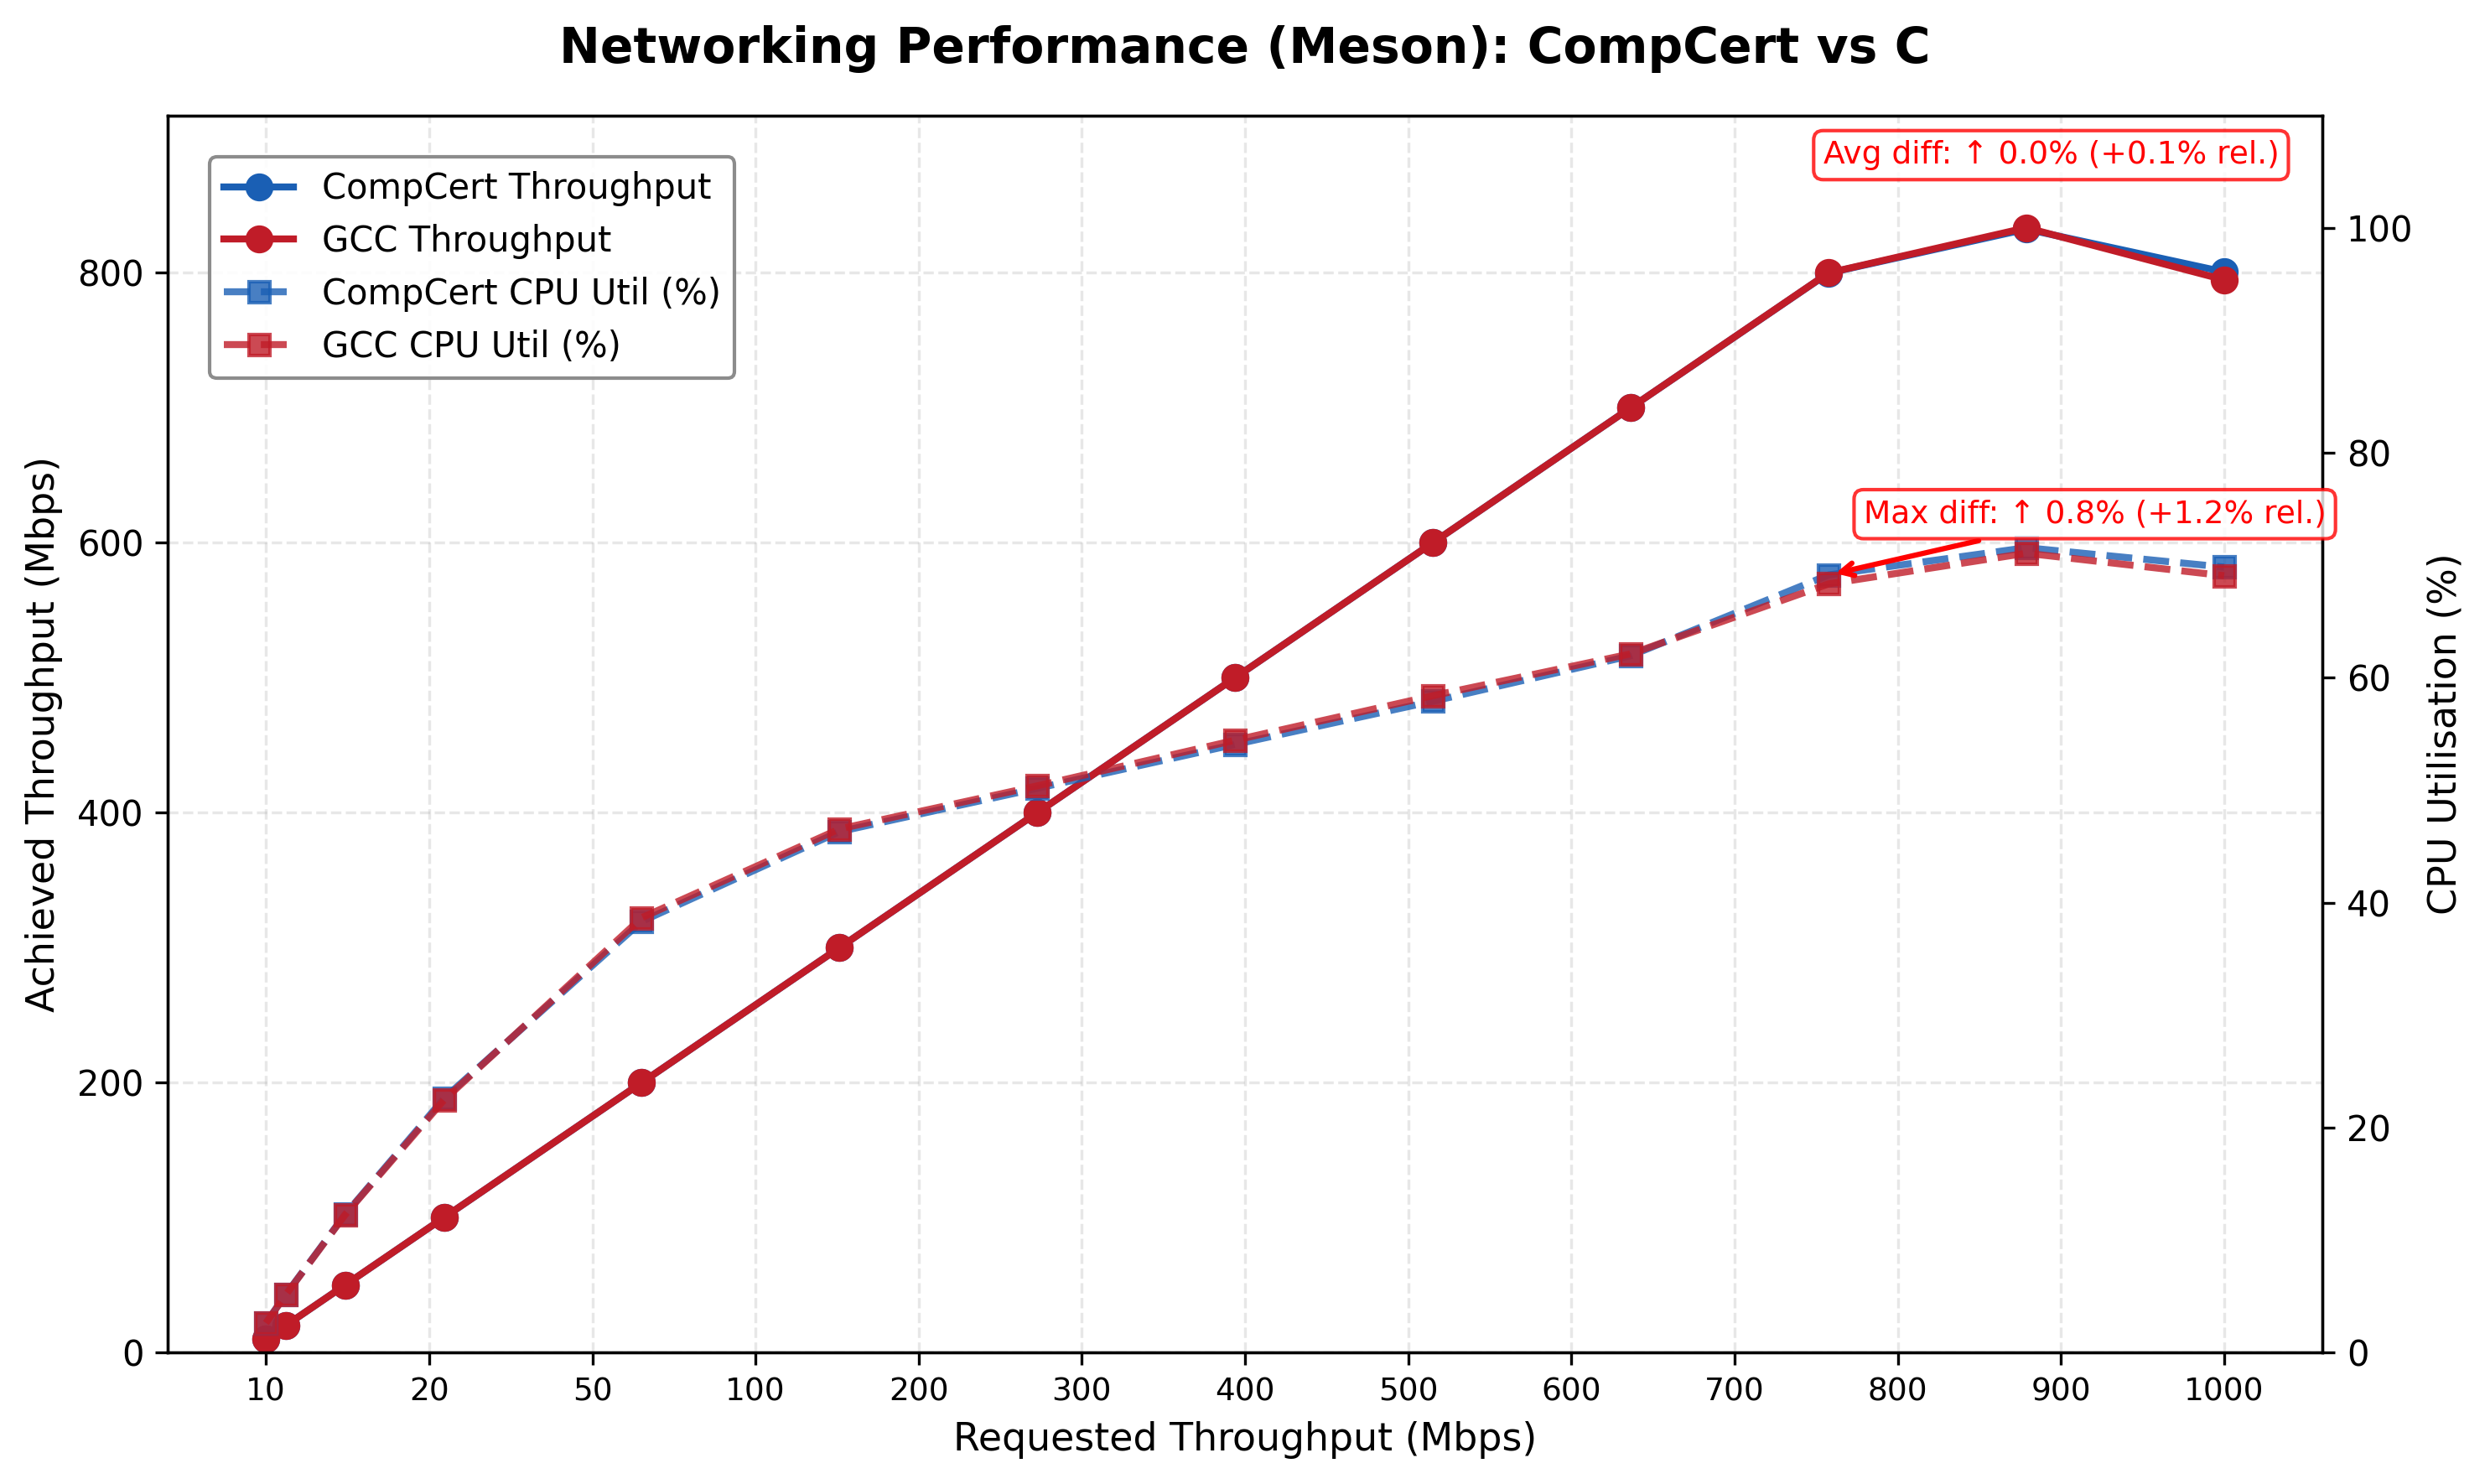

Average relative difference in CPU utilization: 0.12%


In [5]:
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

CompCert_color = '#1A5FB4'
gcc_color = '#C01C28'

ax1.grid(True, linestyle='--', alpha=0.3, which='both')
ax1.set_axisbelow(True)

# Convert throughput to Mbps
compcert_req_mbps = compcert_df['Requested_Throughput'] / 1e6
compcert_recv_mbps = compcert_df['Receive_Throughput'] / 1e6
gcc_req_mbps = gcc_df['Requested_Throughput'] / 1e6
gcc_recv_mbps = gcc_df['Receive_Throughput'] / 1e6

line1, = ax1.plot(compcert_req_mbps, compcert_recv_mbps,
                 marker='o', markersize=7, linestyle='-', linewidth=2, 
                 color=CompCert_color, label='CompCert Throughput')

line2, = ax1.plot(gcc_req_mbps, gcc_recv_mbps,
                 marker='o', markersize=7, linestyle='-', linewidth=2, 
                 color=gcc_color, label='GCC Throughput')

ax1.set_xlabel('Requested Throughput (Mbps)', fontsize=11)
ax1.set_ylabel('Achieved Throughput (Mbps)', fontsize=11)


ax2 = ax1.twinx()

compcert_cpu_util = [(compcert_df['Total_Cycles'][i] - compcert_df['Idle_Cycles'][i]) / compcert_df['Total_Cycles'][i] 
                for i in range(len(compcert_df))]
gcc_cpu_util = [(gcc_df['Total_Cycles'][i] - gcc_df['Idle_Cycles'][i]) / gcc_df['Total_Cycles'][i] 
                for i in range(len(gcc_df))]

line3, = ax2.plot(compcert_req_mbps, [100 * u for u in compcert_cpu_util],
                 marker='s', markersize=6, linestyle='--', linewidth=2, 
                 color=CompCert_color, alpha=0.8, label='CompCert CPU Util (%)')

line4, = ax2.plot(gcc_req_mbps, [100 * u for u in gcc_cpu_util],
                 marker='s', markersize=6, linestyle='--', linewidth=2, 
                 color=gcc_color, alpha=0.8, label='GCC CPU Util (%)')

max_throughput = max(max(compcert_recv_mbps), max(gcc_recv_mbps))
max_cpu_util = max(max([100 * u for u in compcert_cpu_util]), max([100 * u for u in gcc_cpu_util]))

ax1.set_ylim(0, 1.1 * max_throughput)
ax2.set_ylim(0, max(110, 1.2 * max_cpu_util))

ax2.set_ylabel('CPU Utilisation (%)', fontsize=11)
ax1.set_xticks(compcert_req_mbps)

lines = [line1, line2, line3, line4]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10, frameon=True, 
           framealpha=0.9, edgecolor='gray', borderaxespad=1.2)

ax1.set_title('Networking Performance (Meson): CompCert vs C', 
              fontsize=14, fontweight='bold', pad=15)

ax1.set_xticks(np.linspace(min(compcert_req_mbps), max(compcert_req_mbps), len(compcert_req_mbps)))

xlabels = [f'{int(x)}' for x in compcert_req_mbps]
ax1.set_xticklabels(xlabels, fontsize=9)

diff_points = [compcert_cpu_util[i] - gcc_cpu_util[i] for i in range(len(compcert_cpu_util))]
max_diff_idx = np.argmax(np.abs(diff_points))
max_diff_x = compcert_req_mbps[max_diff_idx]
compcert_val = compcert_cpu_util[max_diff_idx] * 100
gcc_val = gcc_cpu_util[max_diff_idx] * 100

max_diff_absolute = compcert_val - gcc_val
max_diff_relative = (abs(max_diff_absolute) / gcc_val) * 100 if gcc_val != 0 else 0

is_CompCert_better = max_diff_absolute < 0  # Lower CPU usage is better
box_color = 'green' if is_CompCert_better else 'red'
arrow_symbol = '↓' if is_CompCert_better else '↑'
sign = '-' if is_CompCert_better else '+'

annotation_text = f'Max diff: {arrow_symbol} {abs(max_diff_absolute):.1f}% ({sign}{abs(max_diff_relative):.1f}% rel.)'
ax2.annotate(annotation_text, 
            xy=(max_diff_x, max(compcert_val, gcc_val)),
            xytext=(10, 15), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color=box_color, lw=1.5),
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=box_color, alpha=0.8),
            fontsize=9,
            color=box_color)

relative_diff = ((np.array(compcert_cpu_util) - np.array(gcc_cpu_util)) / np.array(gcc_cpu_util)) * 100
avg_improvement = np.mean(relative_diff)
avg_absolute_diff = np.mean(np.array(compcert_cpu_util) - np.array(gcc_cpu_util)) * 100

is_avg_CompCert_better = avg_absolute_diff < 0
avg_box_color = 'green' if is_avg_CompCert_better else 'red'
avg_arrow_symbol = '↓' if is_avg_CompCert_better else '↑'
avg_sign = '-' if is_avg_CompCert_better else '+'

avg_props = dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor=avg_box_color)
avg_textstr = f'Avg diff: {avg_arrow_symbol} {abs(avg_absolute_diff):.1f}% ({avg_sign}{abs(avg_improvement):.1f}% rel.)'
ax2.text(0.98, 0.98, avg_textstr, transform=ax2.transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', bbox=avg_props,
         color=avg_box_color)

plt.tight_layout()
plt.savefig('network_perf_meson_CompCert_vs_c.svg', dpi=300, bbox_inches='tight')
plt.show()

print(f"Average relative difference in CPU utilization: {avg_improvement:.2f}%")


Available PD IDs:
  - timer_driver (9)
  - serial_virt_tx (1)
  - serial_driver (0)
  - net_virt_tx (3)
  - net_virt_rx (4)
  - ethernet_driver (2)
  - client1_net_copier (8)
  - client1 (7)
  - client0_net_copier (6)
  - client0 (5)


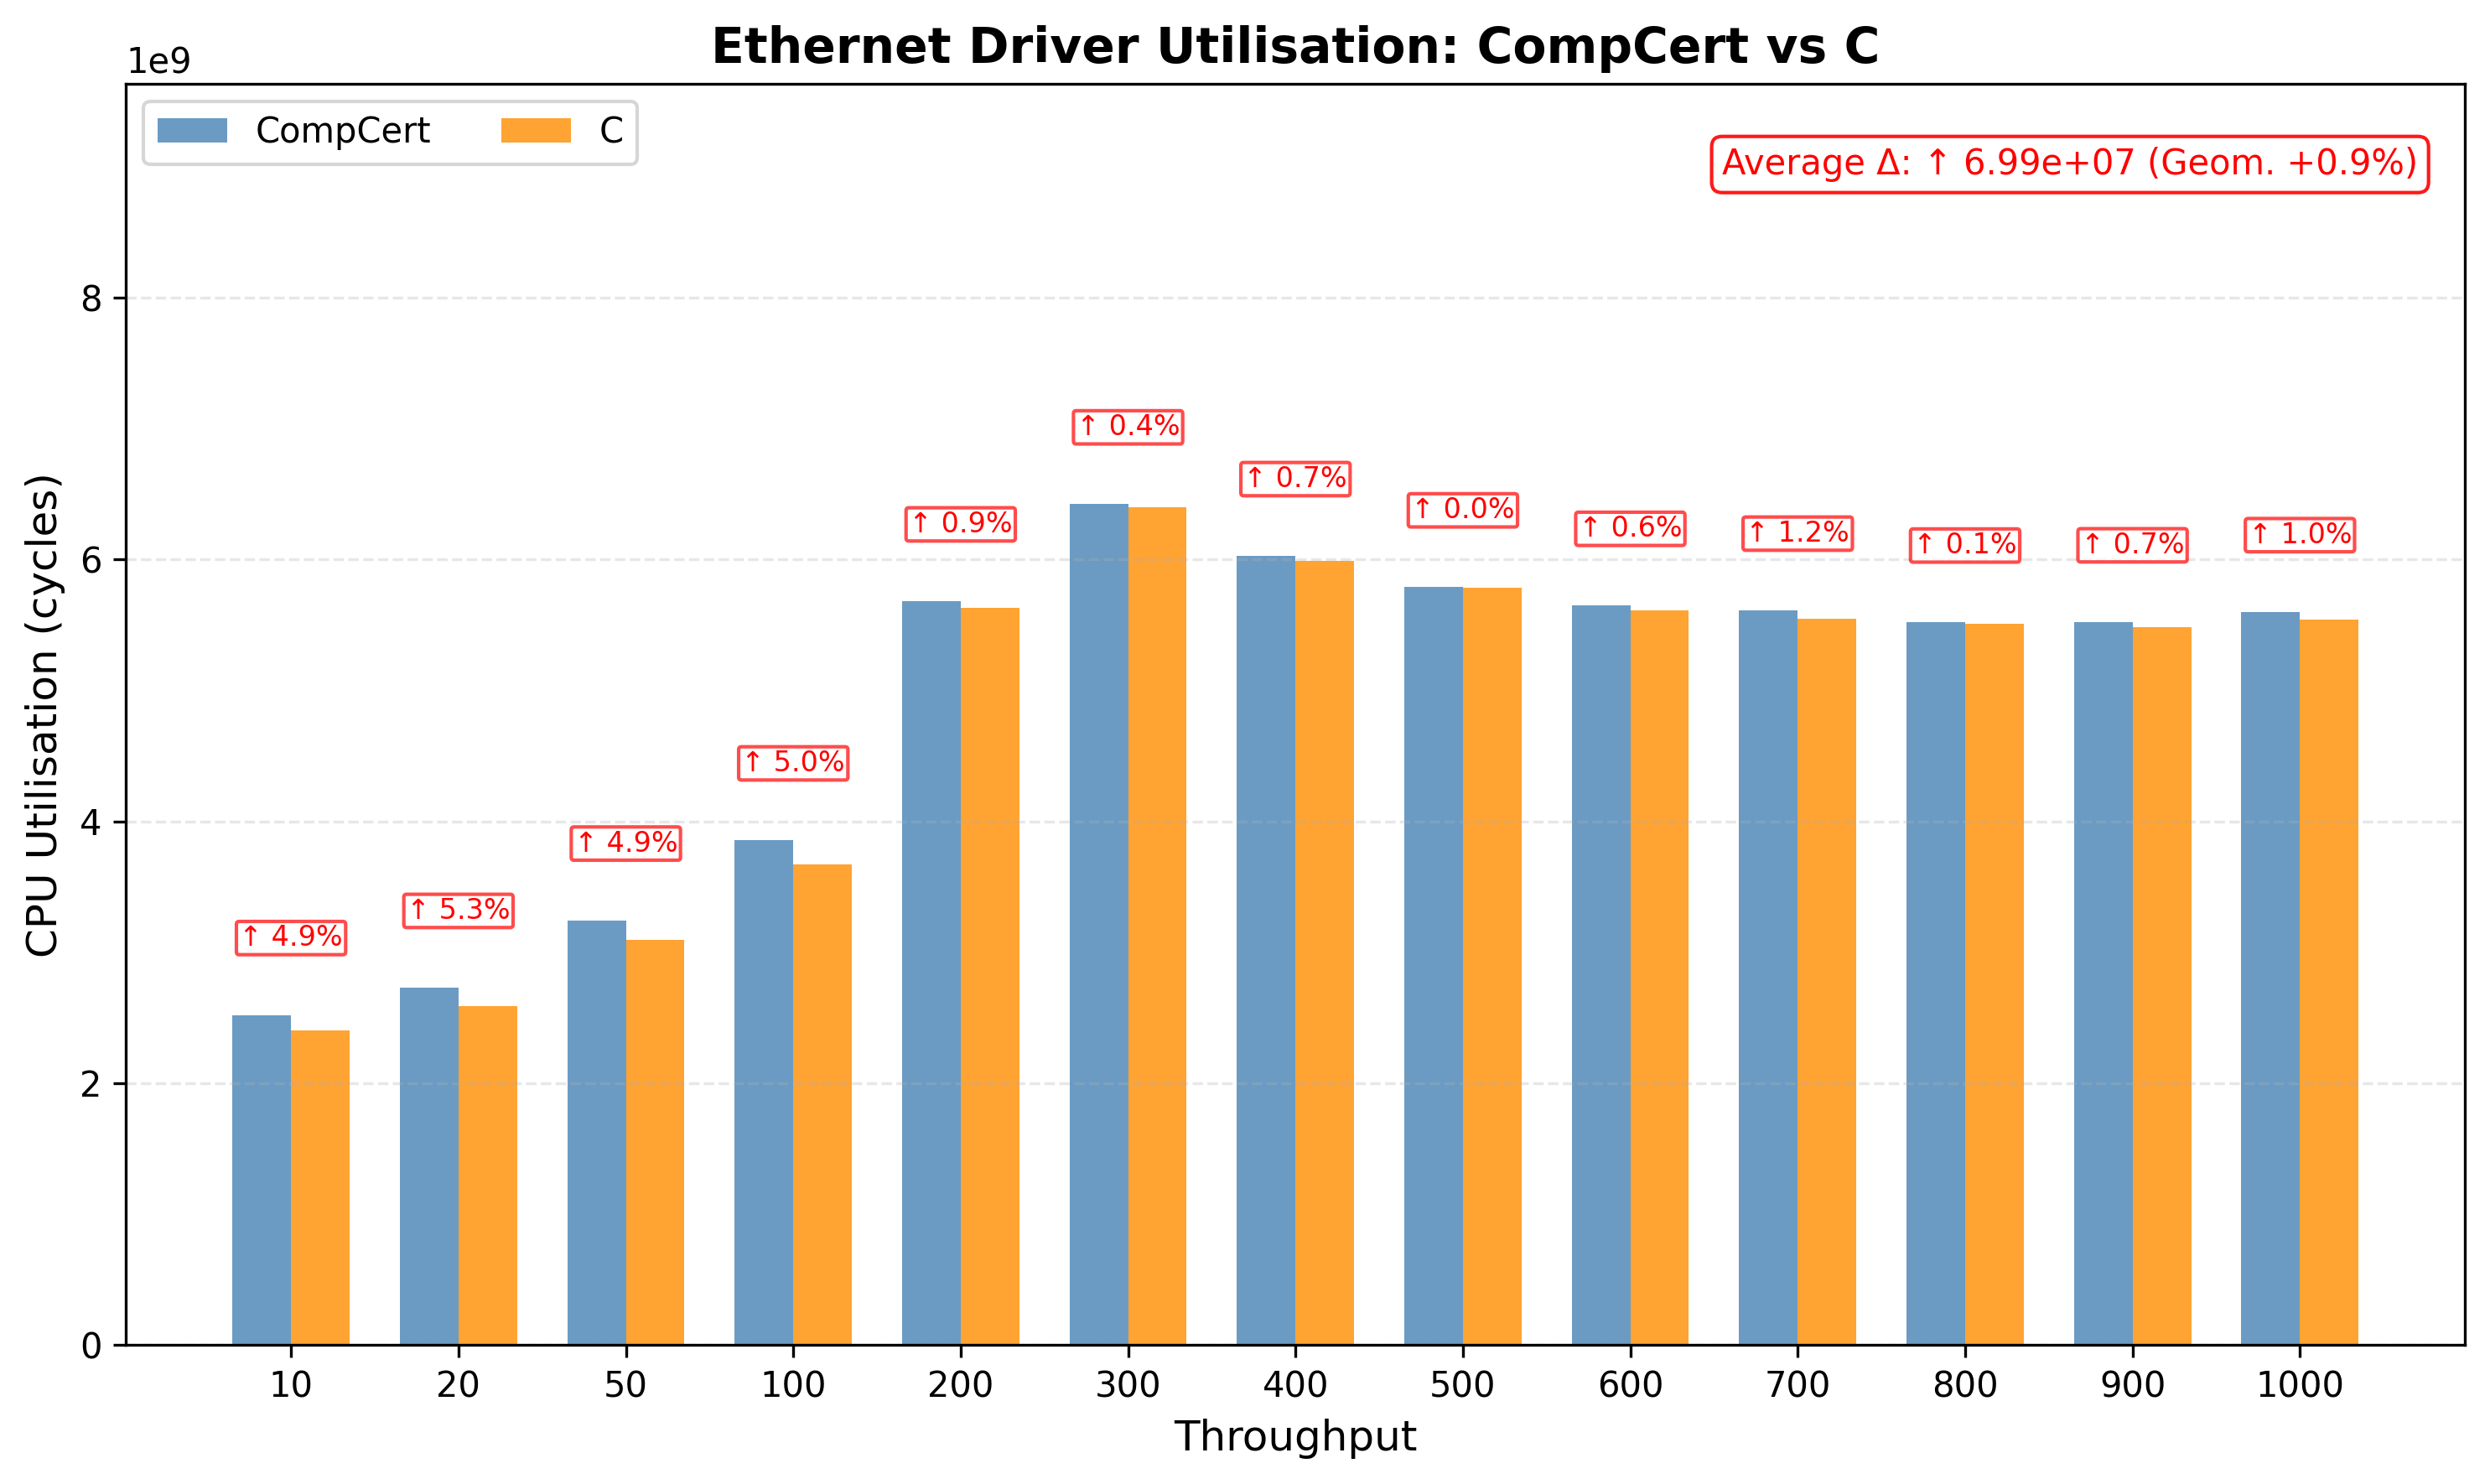

In [6]:
from plotter import UtilizationVisualizer

x_labels = ["10", "20", "50", "100", "200", "300", "400", "500", "600", "700", "800", "900", "1000"]
visualizer = UtilizationVisualizer(compcert_data, gcc_data, name_a="CompCert", name_b="C", x_tick_labels=x_labels)

visualizer.print_available_pds()
visualizer.plot_specific_pd('ethernet_driver (2)', figsize=(10, 6), dpi=300, save_path="compcert_vs_c_ethernet_driver_frac.png", use_percent=False)

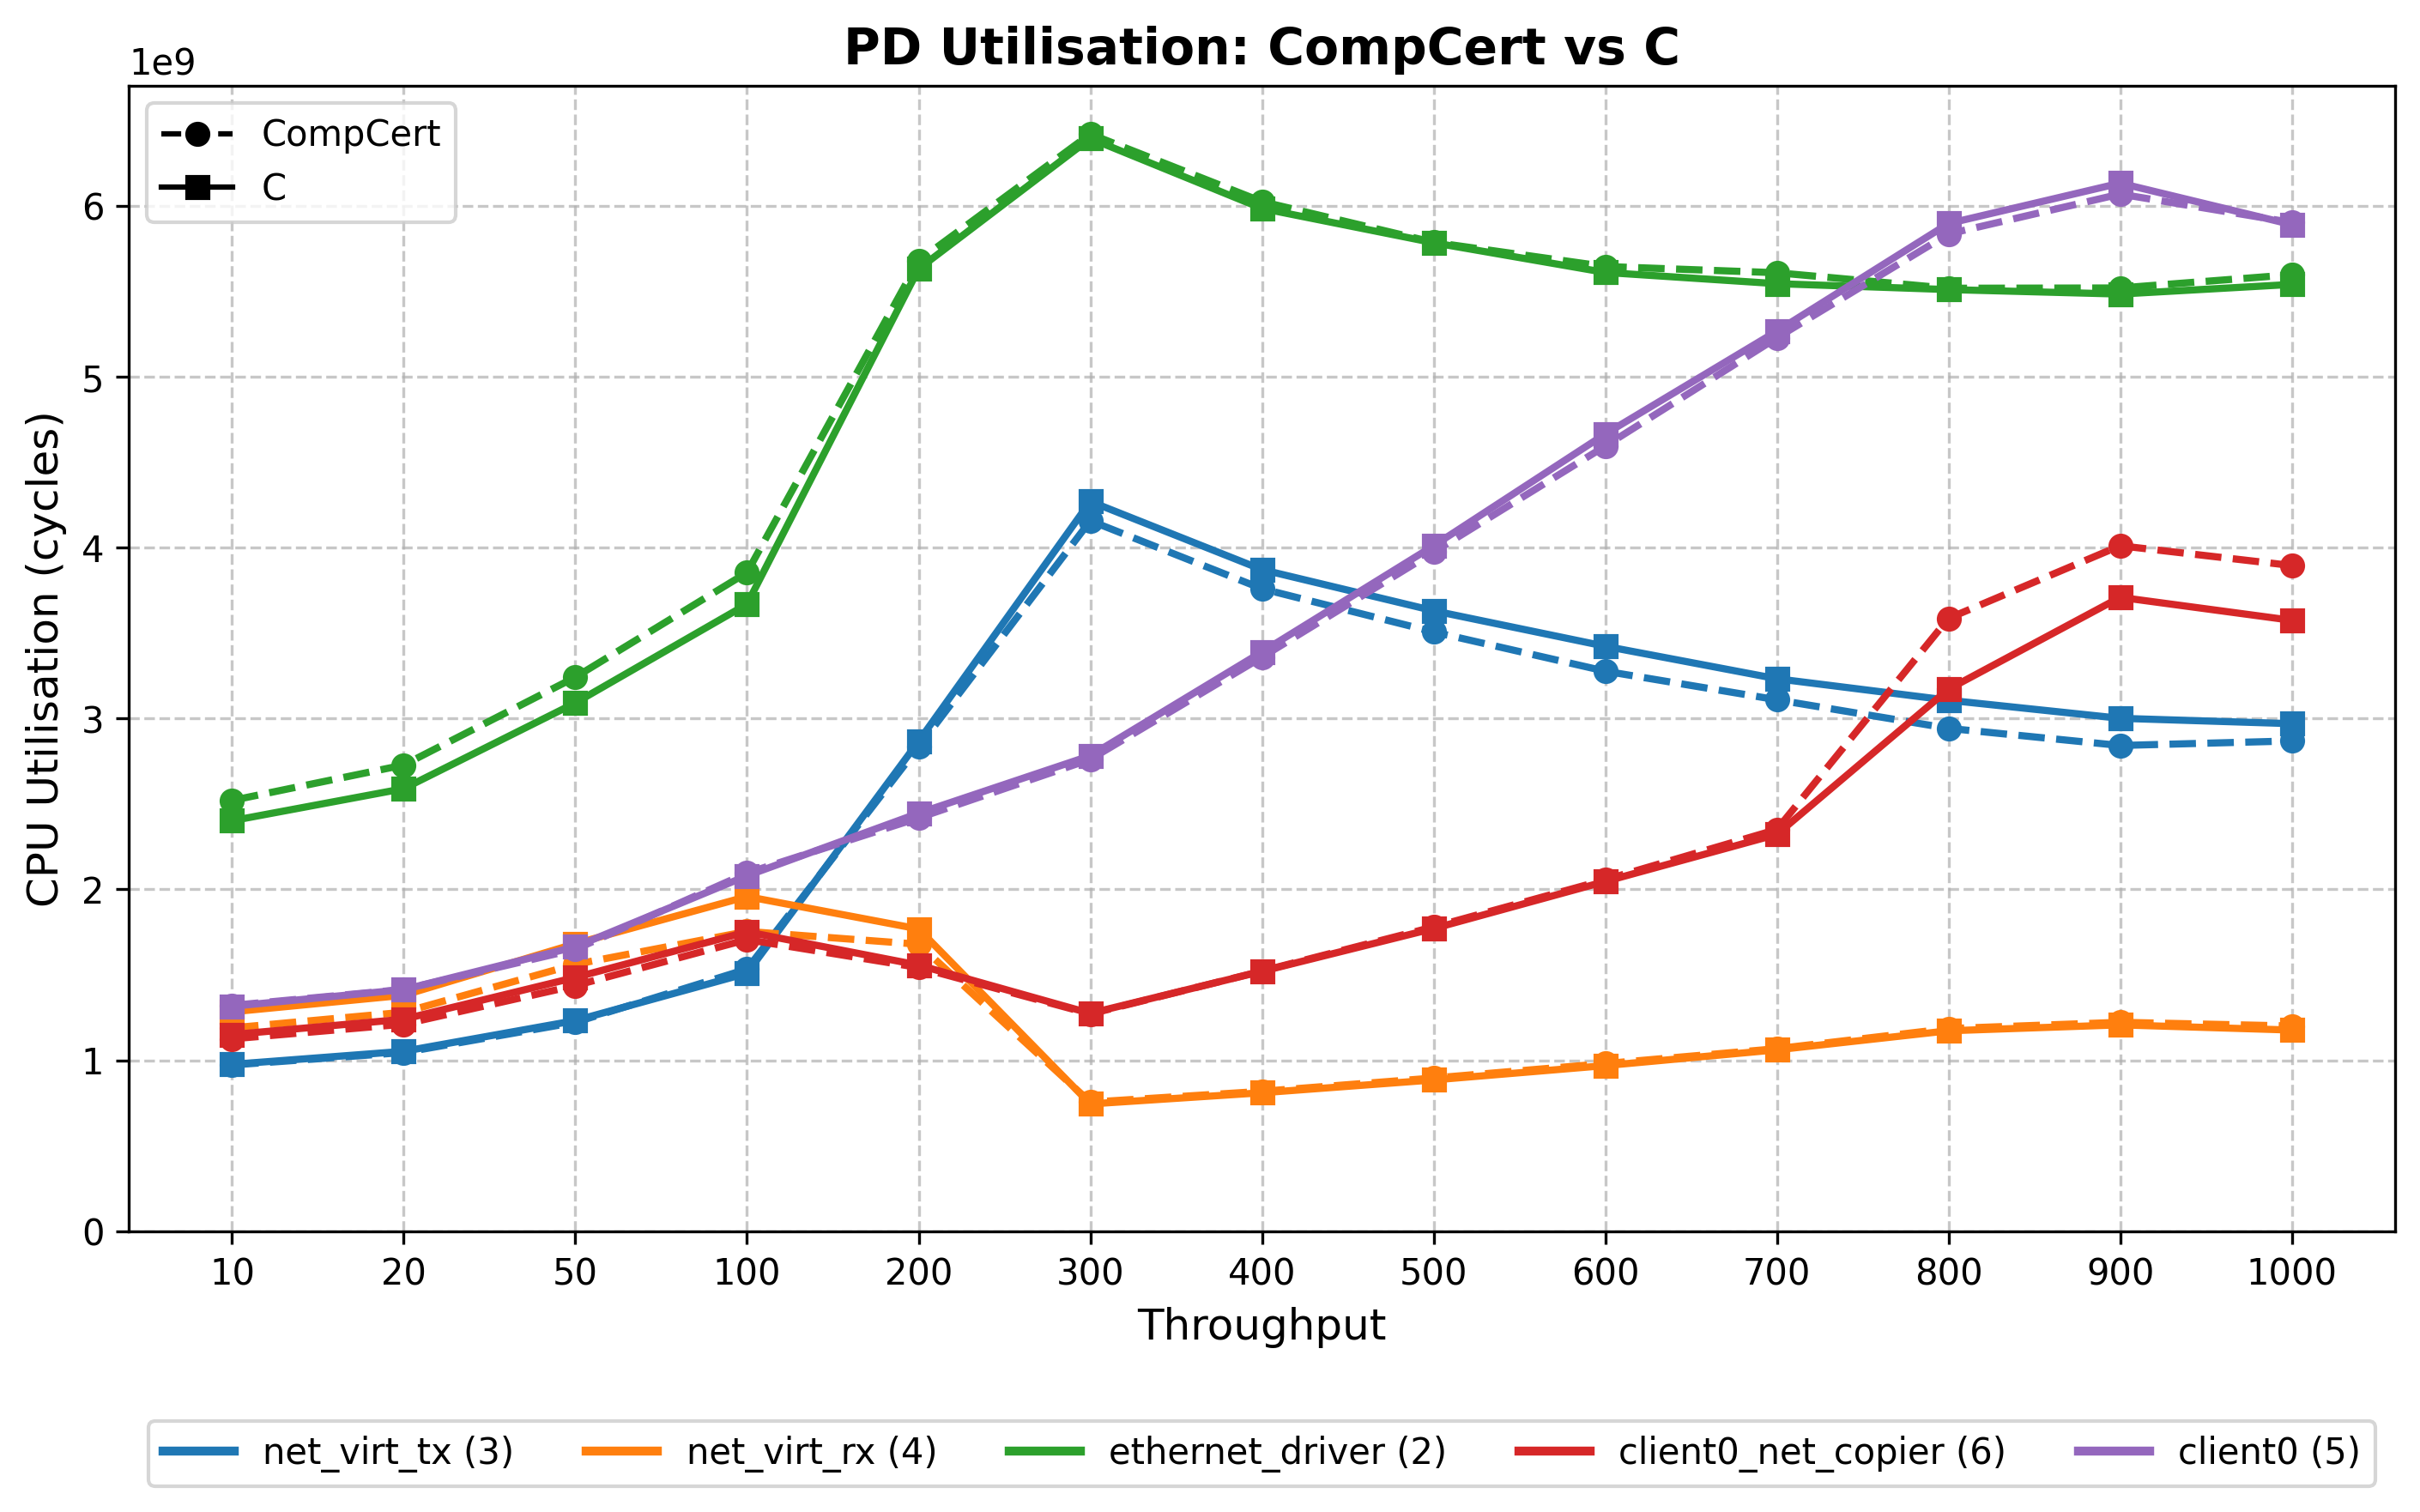

In [7]:
visualizer.set_pds_to_visualize(['net_virt_tx (3)', 'net_virt_rx (4)', 'ethernet_driver (2)', 'client0_net_copier (6)', 'client0 (5)'])
visualizer.plot_all(figsize=(10, 6), dpi=300, save_path="compcert_vs_c_all_pds.svg", use_percent=False)